In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-stocks-dataset-2000-2024/WMT.csv


# **DATA PREPROCESSING**

In [2]:
df = pd.read_csv('/kaggle/input/walmart-stocks-dataset-2000-2024/WMT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,22.791668,23.000000,21.833332,22.270832,14.469358,25109700
1,1/4/2000,21.833332,21.937500,21.395832,21.437500,13.927947,20235300
2,1/5/2000,21.291668,21.458332,20.729168,21.000000,13.643703,21056100
3,1/6/2000,21.000000,21.520832,20.895832,21.229168,13.792585,19633500
4,1/7/2000,21.500000,22.979168,21.500000,22.833332,14.834813,23930700


In [3]:
#statistical inferences
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6.118000e+03
mean,25.835724,26.061299,25.618364,25.840958,21.663140,3.145340e+07
std,11.552502,11.628584,11.482173,11.554953,13.027950,1.977651e+07
min,14.000000,14.226667,13.812500,14.090000,9.398979,6.094200e+06
25%,17.486668,17.674166,17.336666,17.500833,11.893549,1.909170e+07
50%,20.193333,20.373333,20.006666,20.225000,15.388837,2.556390e+07
75%,29.551666,29.820834,29.311667,29.589167,26.622051,3.745148e+07
max,61.320000,61.660000,61.049999,61.450001,61.450001,2.903604e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6118 non-null   object 
 1   Open       6118 non-null   float64
 2   High       6118 non-null   float64
 3   Low        6118 non-null   float64
 4   Close      6118 non-null   float64
 5   Adj Close  6118 non-null   float64
 6   Volume     6118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.7+ KB


In [5]:
#filling missing values
for col in df.columns:
    df.fillna({col : 0}, inplace = True)

    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6118 non-null   object 
 1   Open       6118 non-null   float64
 2   High       6118 non-null   float64
 3   Low        6118 non-null   float64
 4   Close      6118 non-null   float64
 5   Adj Close  6118 non-null   float64
 6   Volume     6118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.7+ KB


# **EXPLORATORY DATA ANALYSIS**

In [6]:
mean_open = df['Open'].mean()
mean_close = df['Close'].mean()
mean_adj = df['Adj Close'].mean()
mean_trade = df['Volume'].mean()

print('MEAN: ')
print('-' * 100)
print()
print(f"The mean opening price for Walmart Stocks from the past 24 years is {mean_open}")
print(f"The mean closing price for Walmart Stocks from the past 24 years is {mean_close}")
print(f"The mean adjusted closing value for Walmart Stocks from the past 24 years is {mean_adj}")
print(f"The mean trading value for Walmart Stocks from the past 24 years is {mean_trade / (10**6)}e+06")
print()
print('-' * 100)
print()

median_open = df['Open'].median()
median_close = df['Close'].median()
median_adj = df['Adj Close'].median()
median_trade = df['Volume'].median()

print('MEDIAN: ')
print('-' * 100)
print()
print(f"The median opening price for Walmart Stocks from the past 24 years is {median_open}")
print(f"The median closing price for Walmart Stocks from the past 24 years is {median_close}")
print(f"The median adjusted closing value for Walmart Stocks from the past 24 years is {median_adj}")
print(f"The median trading value for Walmart Stocks from the past 24 years is {median_trade / (10**6)}e+06")
print()
print('-'*100)

MEAN: 
----------------------------------------------------------------------------------------------------

The mean opening price for Walmart Stocks from the past 24 years is 25.835724366949982
The mean closing price for Walmart Stocks from the past 24 years is 25.840957861556063
The mean adjusted closing value for Walmart Stocks from the past 24 years is 21.66314019630598
The mean trading value for Walmart Stocks from the past 24 years is 31.4534049689441e+06

----------------------------------------------------------------------------------------------------

MEDIAN: 
----------------------------------------------------------------------------------------------------

The median opening price for Walmart Stocks from the past 24 years is 20.193333
The median closing price for Walmart Stocks from the past 24 years is 20.225
The median adjusted closing value for Walmart Stocks from the past 24 years is 15.388837
The median trading value for Walmart Stocks from the past 24 years is 25.

**DATA VISUALISATION**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

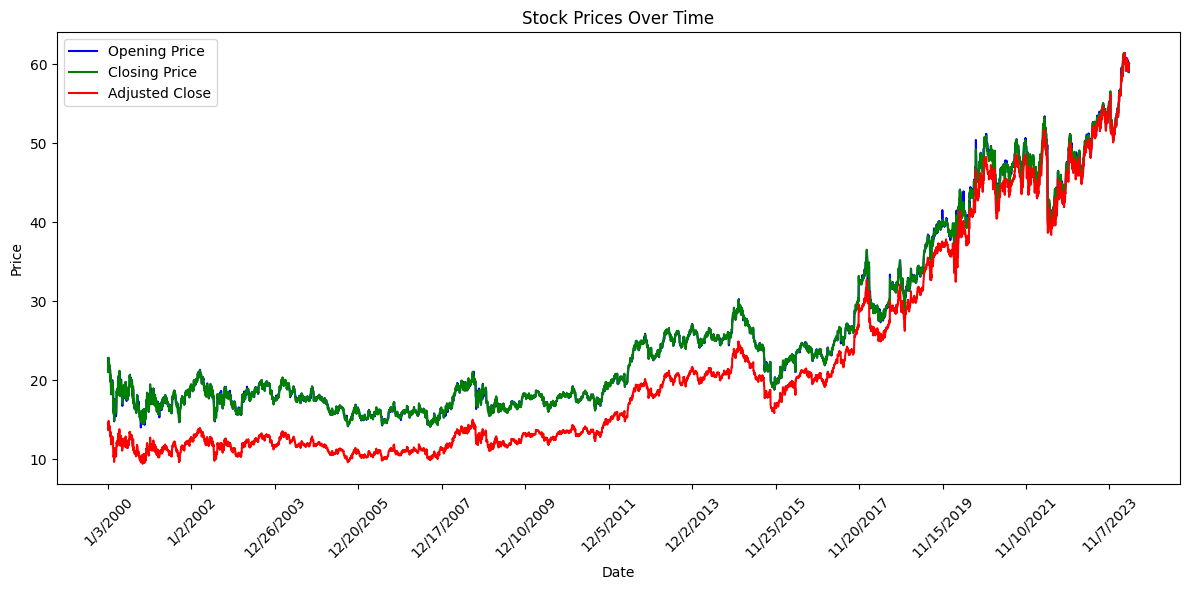

In [8]:
#Time series plots
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Opening Price', color='blue')
plt.plot(df['Date'], df['Close'], label='Closing Price', color='green')
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close', color='red')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][::500], rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


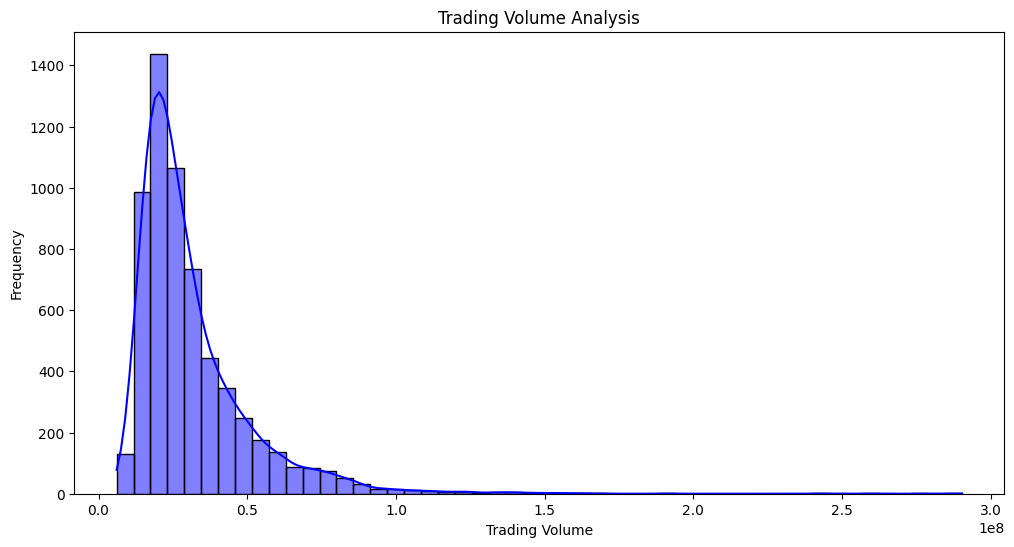

In [9]:
#Trading Volume Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=50, kde=True, color='blue')
plt.title('Trading Volume Analysis')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

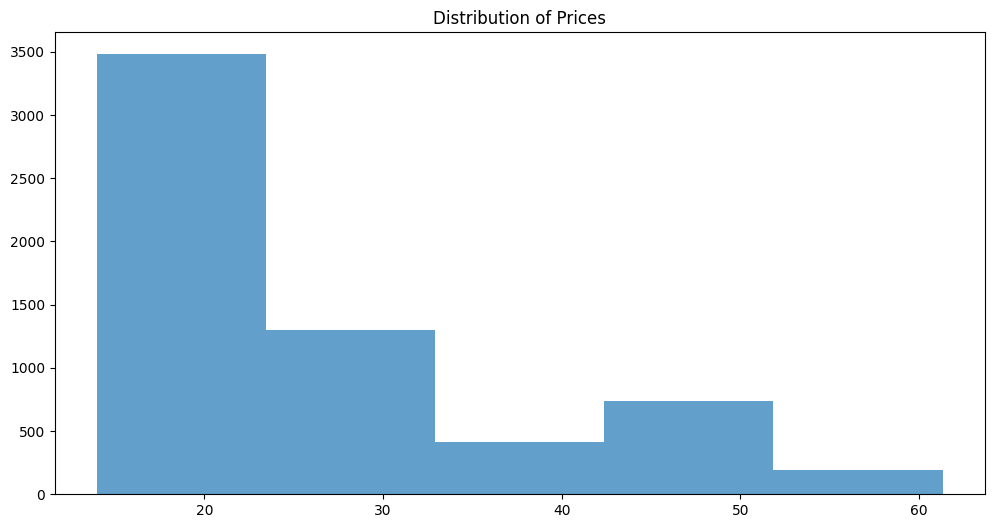

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(df['Open'], bins = 5, alpha = 0.7)
plt.title('Distribution of Prices')
plt.show()

# **CORRELATION**

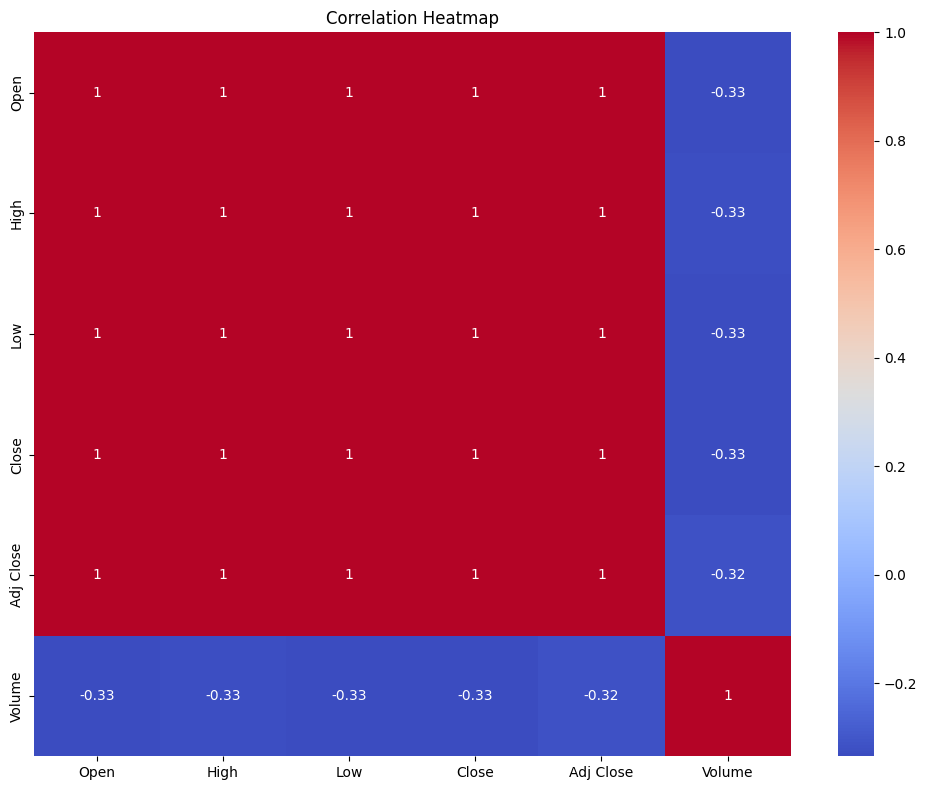

In [11]:
numeric_df = df.drop(columns=['Date'])
 
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**TREND ANALYSIS**

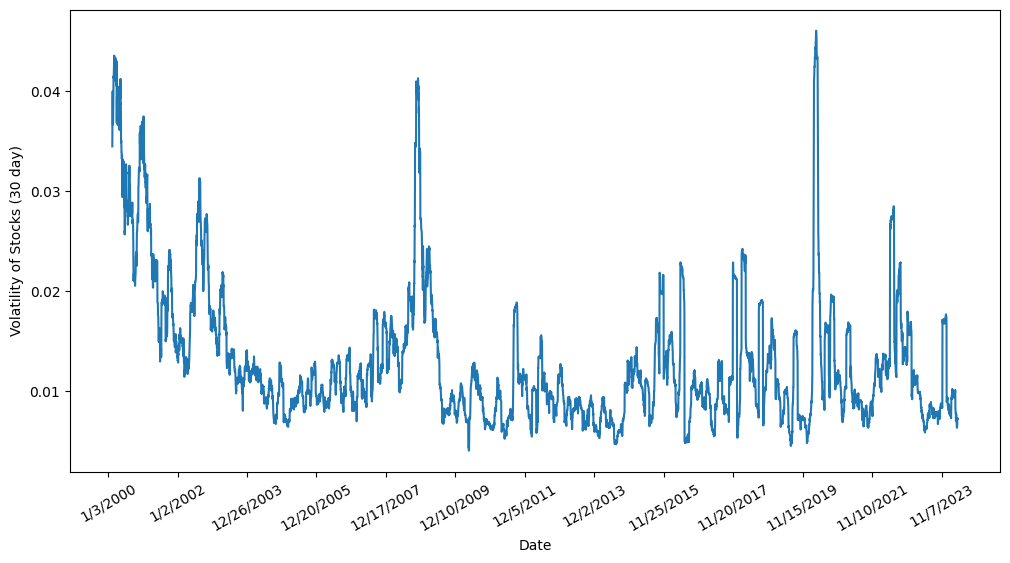

In [12]:
#volatitlity analysis
#i.e. calculate daily returns and analyse the volatility of the stock

#Calculating daily percentage change
df['Daily Return'] = df['Close'].pct_change()
thirtyday_volatility = df['Daily Return'].rolling(window = 30).std()

#visualisation
plt.figure(figsize = (12, 6))
plt.plot(df['Date'], thirtyday_volatility)
plt.xlabel('Date')
plt.ylabel('Volatility of Stocks (30 day)')
plt.xticks(df['Date'][:: 500], rotation = 30)

plt.show()

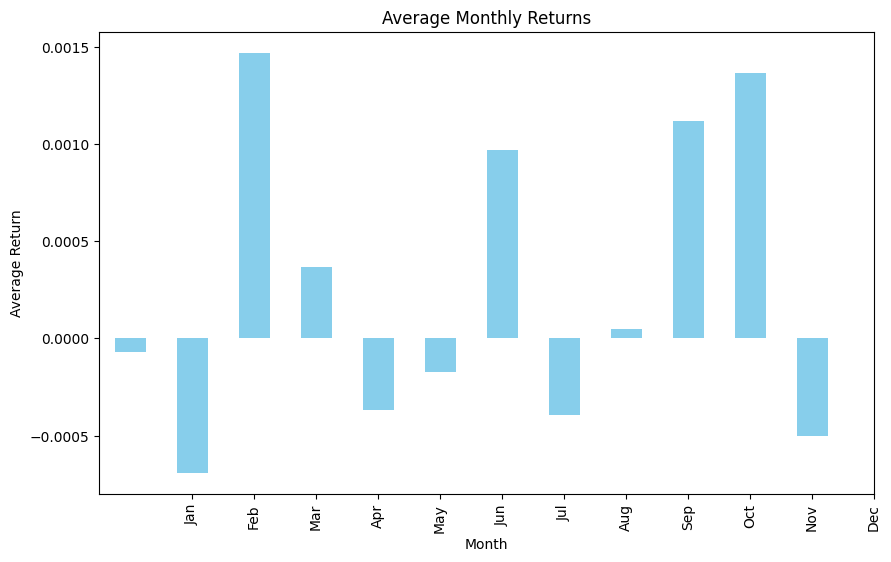

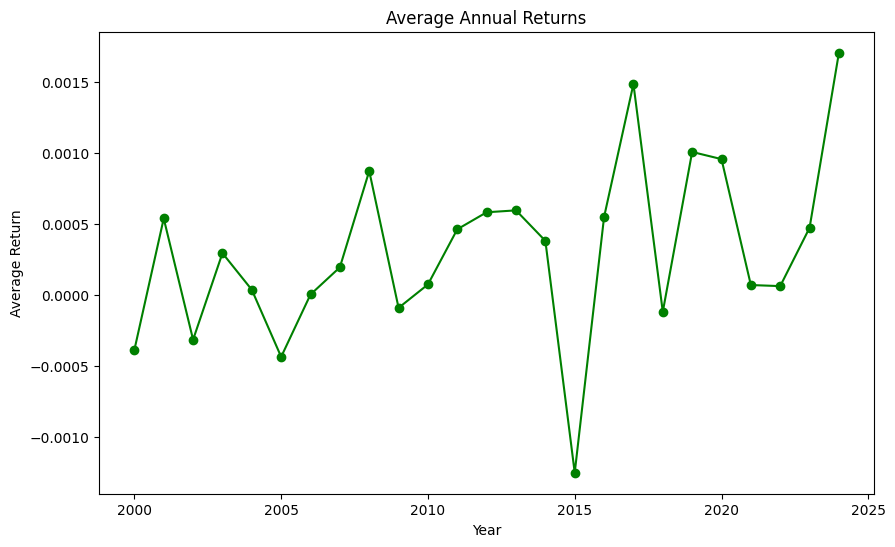

In [16]:
#seasonal trends
#check for seasonal trends by breaking down data by month, quarter or year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

month_wise = df.groupby('Month')['Daily Return'].mean()
year_wise = df.groupby('Year')['Daily Return'].mean()


plt.figure(figsize=(10, 6))
month_wise.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

plt.figure(figsize=(10, 6))
year_wise.plot(kind='line', marker='o', color='green')
plt.title('Average Annual Returns')
plt.xlabel('Year')
plt.ylabel('Average Return')
plt.show()

# **PREDICTIVE ANALYSIS**

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

The aim is to build a simple Linear Regression model that predicts the closing prices based on the opening prices

In [19]:
X = df[['Open']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The Mean Squared Error is : {mse}")
print(f"The R-Squared value is {r2}")

The Mean Squared Error is : 0.09937083911197868
The R-Squared value is 0.999227554845816


The low MSE value and high R-squared value show that the model is quite accurate in predicting the closing prices